## Run bash commands from notebook

In [ ]:
!pip install tqdm

In [ ]:
!pip install gensim

## Import necessary modules

In [2]:
import pandas as pd
import time
import datetime as dt
import numpy as np
import requests
import urllib3
import json 
import random 
from tqdm import tqdm
import pickle 
import gensim
import string
import codecs
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import defaultdict

sns.set()

%matplotlib inline


urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

## Get all courses at NTNU

In [3]:
res = requests.get("http://www.ime.ntnu.no/api/course/-")

In [4]:
res_json = json.loads(res.text)

In [5]:
len(res_json["course"])

5586

In [6]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [7]:
random.choice(res_json["course"])

{'code': 'TET4525',
 'name': 'Elektrisk energiteknikk og smarte nett, fordypningsemne',
 'norwegianName': 'Elektrisk energiteknikk og smarte nett, fordypningsemne',
 'englishName': 'Electric Power Engineering and Smart Grids, Specialisation Course',
 'versionCode': '1'}

In [8]:
def get_grades(emne):
    try:
        res = requests.get("https://grades.no/api/courses/{}/grades.json".format(emne))
        grades = json.loads(res.text)
    except Exception as e:
        print(e)
        grades = {}
    return grades

In [9]:
get_grades("TDT4173")

[{'semester_code': 'H2008',
  'average_grade': 3.533333333333333,
  'passed': 0,
  'a': 7,
  'b': 1,
  'c': 3,
  'd': 2,
  'e': 1,
  'f': 1},
 {'semester_code': 'H2009',
  'average_grade': 3.03125,
  'passed': 0,
  'a': 7,
  'b': 6,
  'c': 11,
  'd': 2,
  'e': 1,
  'f': 5},
 {'semester_code': 'H2010',
  'average_grade': 3.230769230769231,
  'passed': 0,
  'a': 6,
  'b': 6,
  'c': 8,
  'd': 3,
  'e': 0,
  'f': 3},
 {'semester_code': 'H2011',
  'average_grade': 2.576923076923077,
  'passed': 0,
  'a': 2,
  'b': 5,
  'c': 9,
  'd': 3,
  'e': 4,
  'f': 3},
 {'semester_code': 'H2012',
  'average_grade': 2.657142857142857,
  'passed': 0,
  'a': 3,
  'b': 17,
  'c': 26,
  'd': 9,
  'e': 7,
  'f': 8},
 {'semester_code': 'H2013',
  'average_grade': 2.9565217391304346,
  'passed': 0,
  'a': 9,
  'b': 14,
  'c': 8,
  'd': 4,
  'e': 3,
  'f': 8},
 {'semester_code': 'H2014',
  'average_grade': 2.7666666666666666,
  'passed': 0,
  'a': 12,
  'b': 14,
  'c': 9,
  'd': 7,
  'e': 9,
  'f': 9},
 {'semes

In [15]:
grades = {}
for course in tqdm(res_json["course"]):
    grades[course["code"]] = get_grades(course["code"])

 66%|██████▋   | 3704/5586 [28:02<14:14,  2.20it/s]

Expecting value: line 1 column 1 (char 0)


 88%|████████▊ | 4893/5586 [34:58<04:57,  2.33it/s]

HTTPSConnectionPool(host='grades.no', port=443): Max retries exceeded with url: /api/courses/IINI3013/grades.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000027670A7BA58>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))


100%|██████████| 5586/5586 [54:50<00:00,  1.70it/s]


In [10]:
#pickle.dump(grades, open("grades.dict", "wb"))
grades = pickle.load(open("grades.dict", "rb"))

In [11]:
#pickle.dump(res_json, open("course_desc.dict", "wb"))
res_json = pickle.load(open("course_desc.dict", "rb"))

In [12]:
df = pd.DataFrame(res_json["course"])

In [13]:
df.head()

,code,englishName,name,newNorwegianName,norwegianName,versionCode
0,MA3402,Analysis on Manifolds,Analyse på mangfoldigheter,Analyse på mangfoldigheter,Analyse på mangfoldigheter,1
1,MUSP4145,Chamber Music B,Kammermusikk B,Kammermusikk B,Kammermusikk B,1
2,MUSP4136,Accompaniment A,Akkompagnering A,Akkompagnering A,Akkompagnering A,1
3,MUSP4137,Secondary Instrument 1,Biinstrument 1,Biinstrument 1,Biinstrument 1,1
4,BA8304,Soil Modelling,Jordmodellering,Jordmodellering,Jordmodellering,1


In [14]:
def get_desc(emne):
    try:
        res = requests.get("http://www.ime.ntnu.no/api/course/en/{}".format(emne)) 
        desc = json.loads(res.text)
    except Exception as e:
        print(e)
        desc = {}
    return desc

In [15]:
get_desc("TDT4171")

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [78]:
info = {}
for course in tqdm(res_json["course"]):
    info[course["code"]] = get_desc(course["code"])

100%|██████████| 5586/5586 [06:54<00:00, 13.48it/s]


In [16]:
#pickle.dump(info, open("info_english.dict", "wb"))
info = pickle.load(open("info_english.dict", "rb"))

In [17]:
info["TDT4171"]

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [18]:
doc = {}
for course in tqdm(res_json["course"]):
    if "infoType" in info[course["code"]]["course"].keys():
        #print(info[course["code"]]["course"]["infoType"])
        text = []
        for x in info[course["code"]]["course"]["infoType"]:
            if x["code"] in ["INNHOLD", "KURSMAT", "MÅL"]:
                try:
                    text.append(x["text"])
                except KeyError:
                    pass
                doc[course["code"]] = "".join(text)

100%|██████████| 5586/5586 [00:00<00:00, 231289.37it/s]


In [19]:
res = requests.get("http://www.ime.ntnu.no/api/org/-") 
org = json.loads(res.text)
org

{'orgUnit': [{'orgUnitId': 1,
   'category': 'Organisasjon',
   'acronym': 'NTNU',
   'name': 'Norges teknisk-naturvitenskapelige universitet',
   'description': 'Norges teknisk- naturvitenskapelige universitet',
   'email': 'postmottak@ntnu.no',
   'url': 'https://www.ntnu.no',
   'validFrom': '1996-01-01',
   'subUnit': [{'orgUnitId': 760,
     'category': ' ',
     'acronym': 'RE',
     'name': 'Rektor',
     'parentId': 1,
     'email': 'postmottak@ntnu.no',
     'url': 'https://www.ntnu.no/rektor',
     'validFrom': '2007-01-01',
     'subUnit': [{'orgUnitId': 1042,
       'category': 'Stab',
       'acronym': 'FO',
       'name': 'Prorektor for forskning',
       'parentId': 760,
       'email': 'postmottak@ntnu.no',
       'url': 'https://www.ntnu.no/prorektor-forskning',
       'validFrom': '2009-08-01',
       'subUnit': [{'orgUnitId': 1044,
         'category': 'Stab',
         'acronym': 'FO-STAB',
         'name': 'Prorektor forskning',
         'parentId': 1042,
         '

In [94]:
def get_subunits(unit, level):
    global orgid_to_fac
    level+=1
    if "subUnit" in unit.keys():
        for subunit in unit["subUnit"]:
            print("\t"*level+subunit["acronym"])
            print("\t"*level+subunit["name"])
            print("\t"*level+str(subunit["orgUnitId"]))
            orgid_to_fac[subunit["orgUnitId"]] = unit["acronym"]
            orgid_to_inst[subunit["orgUnitId"]] = subunit["acronym"]
        return get_subunits(subunit, level)
    else:
        return False

In [95]:
level = 0
orgid_to_fac = defaultdict(str)
orgid_to_inst = defaultdict(str)
for unit in org["orgUnit"][0]["subUnit"][0]["subUnit"]:
    print(unit["acronym"])
    print(unit["name"])
    get_subunits(unit, level)

FO
Prorektor for forskning
	FO-STAB
	Prorektor forskning
	1044
NY
Prorektor for nyskaping
	NY-STAB
	Prorektor nyskaping
	1045
UTD
Prorektor for utdanning
	UTD-STAB
	Prorektor utdanning
	765
	UTD-ST
	Avdeling for studenttjenester
	1201
	UTD-SA
	Avdeling for studieadministrasjon
	1200
	UTD-UK
	Avdeling for utdanningskvalitet
	767
	UTD-UB
	NTNU Universitetsbiblioteket
	774
		UTD-UB-ADM
		Bibliotekadministrasjonen
		1050
		UTD-UB-SANT
		Bibliotekseksjon for arkitektur, naturvitenskap, teknologi og økonomi
		1051
		UTD-UB-HUMSAM
		Bibliotekseksjon for humaniora, samfunns- og utdanningsvitenskap
		1023
		UTD-UB-SKV
		Bibliotekseksjon for kultur- og vitenskapshistorie
		1024
		UTD-UB-MH
		Bibliotekseksjon for medisin og helsevitenskap
		1048
		UTD-UB-SD
		Bibliotekseksjon for samlinger og digitale tjenester
		1046
		UTD-UB-GJO
		Bibliotekseksjon i Gjøvik
		1096
		UTD-UB-ALS
		Bibliotekseksjon i Ålesund
		1115
RE-REK
Rektor og styre
HF
Det humanistiske fakultet
	HF-ADM
	HF fakultetsadministras

In [38]:
def get_fac_from_ouid(ouid):
    try:
        r = requests.get("http://www.ime.ntnu.no/api/org/{}".format(ouid)) 
        o = json.loads(r.text)
        fac = o["orgUnitDetailed"]["acronym"]
    except Exception as e:
        print(e)
        fac = None
    return fac

In [96]:
orgid_to_fac

defaultdict(str,
            {1044: 'FO',
             1045: 'NY',
             765: 'UTD',
             1201: 'UTD',
             1200: 'UTD',
             767: 'UTD',
             774: 'UTD',
             1050: 'UTD-UB',
             1051: 'UTD-UB',
             1023: 'UTD-UB',
             1024: 'UTD-UB',
             1048: 'UTD-UB',
             1046: 'UTD-UB',
             1096: 'UTD-UB',
             1115: 'UTD-UB',
             815: 'HF',
             1082: 'HF',
             1081: 'HF',
             821: 'HF',
             823: 'HF',
             1080: 'HF',
             822: 'HF',
             808: 'AD',
             1213: 'AD',
             1214: 'AD',
             840: 'AD',
             813: 'AD',
             826: 'IE',
             1163: 'IE',
             827: 'IE',
             832: 'IE',
             829: 'IE',
             1215: 'IE',
             831: 'IE',
             828: 'IE',
             830: 'IE',
             835: 'IV',
             1076: 'IV',
             1

In [97]:
orgid_to_inst

defaultdict(str,
            {1044: 'FO-STAB',
             1045: 'NY-STAB',
             765: 'UTD-STAB',
             1201: 'UTD-ST',
             1200: 'UTD-SA',
             767: 'UTD-UK',
             774: 'UTD-UB',
             1050: 'UTD-UB-ADM',
             1051: 'UTD-UB-SANT',
             1023: 'UTD-UB-HUMSAM',
             1024: 'UTD-UB-SKV',
             1048: 'UTD-UB-MH',
             1046: 'UTD-UB-SD',
             1096: 'UTD-UB-GJO',
             1115: 'UTD-UB-ALS',
             815: 'HF-ADM',
             1082: 'HF-IFR',
             1081: 'HF-IHS',
             821: 'HF-IKM',
             823: 'HF-IMU',
             1080: 'HF-ISL',
             822: 'HF-KULT',
             808: 'AD-ADM',
             1213: 'AD-IAP',
             1214: 'AD-IAT',
             840: 'AD-ID',
             813: 'AD-KIT',
             826: 'IE-ADM',
             1163: 'IE-IAL',
             827: 'IE-IDI',
             832: 'IE-IES',
             829: 'IE-IEL',
             1215: 'IE-IIR',
  

## Pandas <3

Create pandas DataFrame from the dictionary

In [40]:
doc_df = pd.DataFrame.from_dict(doc, orient="index", columns=["description"])

In [41]:
doc_df.head()

,description
MA3402,The course deals with fundamental concepts fro...
MUSP4145,This subject includes chambermusic- repertoire...
MUSP4136,The course includes accompaniment and ensemble...
MUSP4137,Individual lectures and independent work on th...
BA8304,"The course is given every second year, next ti..."


In [42]:
doc_df.sample(5)

,description
TT8306,"The course is offered every second year, but c..."
KLH3109,The course offers an introduction to the disci...
LBAS3003,
IØ8400,The course material will partly be decided bas...
PPU4613,


Add column with description-length for each course

In [43]:
doc_df["length"] = doc_df.description.apply(lambda x: len(x))

In [44]:
doc_df.sample(5)

,description,length
TKP4115,The course consists of lectures and guided exe...,1396
TDT4859,"For further information, see www.ntnu.edu/eit ...",85
ID302809,The foundation for information security\r\n- t...,1927
TPK4120,Definition and discussion of basic concepts re...,1749
FM3002,FM3002 is a theoretical film and media studies...,1347


In [45]:
doc_df["emne"] = doc_df.index.values

In [46]:
doc_df["ouid"] = doc_df.emne.apply(lambda emne: info[emne]["course"]["ouId"])

In [98]:
doc_df["fac"] = doc_df.ouid.map(lambda orgid: orgid_to_fac[orgid])

In [102]:
doc_df["inst"] = doc_df.ouid.map(lambda orgid: orgid_to_inst[orgid])

In [99]:
rest = doc_df[doc_df.fac.apply(lambda x: len(x)==0)].ouid.map(get_fac_from_ouid)
rest

MD4072       MH
NRS8004      MH
NRS8002      MH
AAR4805      AD
AAR4600      AD
MD4030       MH
MD4061       MH
SPRÅK8895    HF
ESTET8881    HF
AAR4918      AD
ARK8871      HF
SPRÅK8861    HF
SPRÅK8865    HF
SPRÅK8877    HF
RVI8871      HF
MD4051       MH
IFEL8000     IV
ESTET8863    HF
HMS0002      IE
NRS8003      MH
ØK8000       OK
SPRÅK8868    HF
ESTET8880    HF
AAR4906      AD
SPRÅK8863    HF
SPRÅK8882    HF
MD3004       MH
MD4053       MH
HIKU8862     HF
MD4031       MH
             ..
ESTET8871    HF
AAR4800      AD
MD3002       MH
MD3012       MH
MD3016       MH
SPRÅK8881    HF
MD4020       MH
SPRÅK8885    HF
TLOG3010     IV
SFEL8000     SU
SPRÅK8896    HF
AAR4801      AD
HMS0003      NV
HIKU8861     HF
SPRÅK8873    HF
AAR4505      AD
SPRÅK8874    HF
SPRÅK8875    HF
AAR4601      AD
MD4062       MH
MD4042       MH
KOMP1003     IE
FI8871       HF
MD3003       MH
NRSN8001     MH
SPRÅK8876    HF
MD4011       MH
AAR4901      AD
SPRÅK8869    HF
KOMP1001     IE
Name: ouid, Length: 84, 

Set the values that are missing

In [100]:
doc_df.loc[rest.index, "fac"] = rest.values

Anyone without label now?

In [101]:
doc_df[doc_df.fac.apply(lambda x: len(x)==0)]

,description,length,emne,ouid,label,fac


Save the DataFrame

In [104]:
doc_df.to_pickle("doc_df.pkl")

In [105]:
doc_df.sample(5)

,description,length,emne,ouid,fac,inst
FARM3002,The molecular processes which creates the basi...,1283,FARM3002,852,MH,MH-IKOM
TKJ4200,Construction of entropy production for systems...,1513,TKJ4200,868,NV,NV-IKJ
TN203611-001,"-Nautical publications (charts, pilot descript...",1482,TN203611-001,1219,IV,IV-IHB
TIØ4317,The course covers financial econometrics and f...,2173,TIØ4317,881,OK,OK-IOT
SØK3521,The course includes the role and significance ...,1348,SØK3521,877,OK,OK-ISO


Distribution of description length

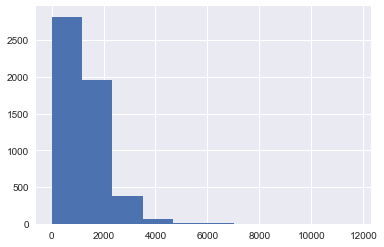

In [52]:
doc_df.length.hist()

Distribution of courses by faculty

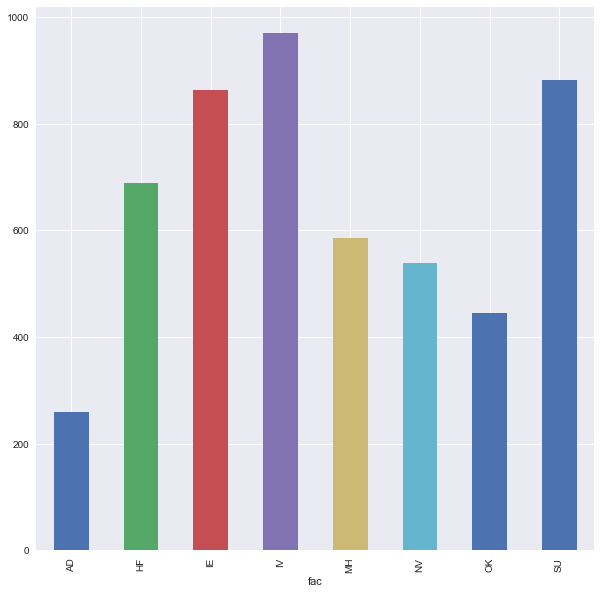

In [106]:
doc_df.groupby("fac")["fac"].agg("count").plot(kind="bar", figsize=(10,10))

Create a DataFrame from the grade-dictionary

In [62]:
max([len(v) for k, v in grades.items()])

38

In [78]:
rows = []
for k,v in grades.items():
    for rec in v:
        if (type(rec)==dict):
            rows.append(([k]+list(rec.values())))
        else:
            print(type(rec))
            print(rec)

<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>

<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>

<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>
detail
<class 'str'>

In [79]:
rec

{'semester_code': 'V2018',
 'average_grade': 3.9411764705882355,
 'passed': 0,
 'a': 4,
 'b': 8,
 'c': 5,
 'd': 0,
 'e': 0,
 'f': 0}

In [234]:
doc_df.shape

(5233, 6)

In [235]:
doc_df = doc_df[doc_df.length>0]

In [236]:
doc_df.shape

(4058, 6)

In [81]:
grade_df = pd.DataFrame(rows, columns=["emne"]+list(rec.keys()))
grade_df.head(20)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0
5,MA3402,H2012,4.750000,0,3,1,0,0,0,0
6,MA3402,H2013,4.000000,0,2,1,2,0,0,0
7,MA3402,H2014,4.250000,0,6,1,0,0,0,1
8,MA3402,H2015,3.916667,0,6,3,0,2,1,0
9,MA3402,H2016,3.900000,0,6,2,0,0,1,1


In [82]:
grade_df.to_pickle("grade_df.pkl")

In [108]:
merged = grade_df.merge(doc_df.loc[:,["emne", "fac", "inst"]], how="left", on="emne")

In [109]:
merged.head()

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0,IE,IE-IMF
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0,IE,IE-IMF
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0,IE,IE-IMF
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0,IE,IE-IMF
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0,IE,IE-IMF


In [115]:
merged["year"] = merged.semester_code.apply(lambda x: int(x[1:]))
merged.sample(5)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst,year
34209,TTK4105,V2016,2.359296,0,32,75,97,65,58,71,IE,IE-ITK,2016
23811,HRAD1003,H2013,0.000000,35,0,0,0,0,0,12,MH,MH-ISB,2013
1265,TIØ4230,H2011,3.178571,0,4,15,27,8,1,1,OK,OK-IOT,2011
8367,TK8103,H2007,3.833333,0,3,2,0,0,0,1,IE,IE-ITK,2007
13773,FILM1010,V2014,2.666667,0,0,1,4,0,0,1,HF,HF-IKM,2014


Average grade distribution by faculty

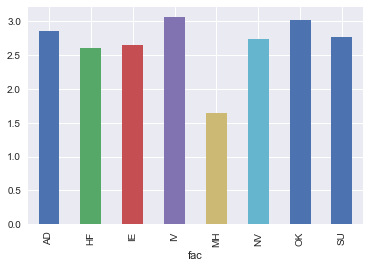

In [112]:
merged.groupby("fac")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IE

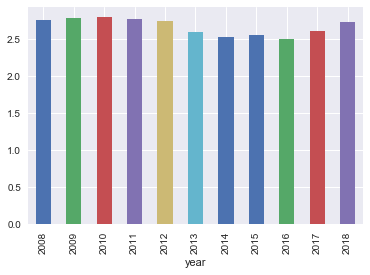

In [118]:
merged.loc[(merged.year>=2008) & (merged.fac=="IE")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IDI

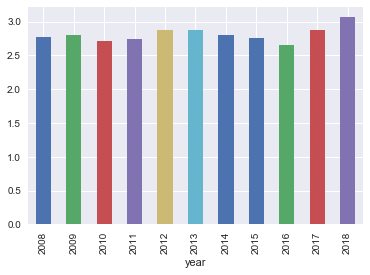

In [119]:
merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Increase in percentage since 2016

In [126]:
vals = merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean")[[2016, 2018]].values
vals

array([2.65420114, 3.06161829])

In [129]:
vals[1]/vals[0]

1.1534989767558277

In [130]:
merged.to_pickle("merged.pkl")

## Natural Language Processing

In [131]:
doc_df.description["IT3708"]

'The main focus of the course is to build intelligent systems based on two key natural concepts: evolution by natural selection and swarm intelligence.  Such intelligent systems have thousands of useful applications in fields as diverse as control theory, telecommunications, music and art.  This course discusses both methods in great detail along with providing a bit of the biological basis for each.Lecture slides, a textbook (possibly 2).  Textbooks are chosen  at the beginning of the semester.Students will get both theoretical and practical programming experience with two of the best known sub-symbolic AI methods: evolutionary algorithms and swarm intelligence algorithms. '

In [132]:
remove_punctuation = lambda d: "".join([ (c if c not in string.punctuation+"\n\r\t" else " ") for c in d])

In [133]:
remove_punctuation(doc_df.description["IT3708"])

'The main focus of the course is to build intelligent systems based on two key natural concepts  evolution by natural selection and swarm intelligence   Such intelligent systems have thousands of useful applications in fields as diverse as control theory  telecommunications  music and art   This course discusses both methods in great detail along with providing a bit of the biological basis for each Lecture slides  a textbook  possibly 2    Textbooks are chosen  at the beginning of the semester Students will get both theoretical and practical programming experience with two of the best known sub symbolic AI methods  evolutionary algorithms and swarm intelligence algorithms  '

In [134]:
stemmer = PorterStemmer()

In [135]:
?PorterStemmer

In [137]:
tokenize = lambda d: [stemmer.stem(w.lower()) for w in remove_punctuation(d).split(" ") if len(w)>0]

In [138]:
tokenize(doc_df.description["IT3708"])

['the',
 'main',
 'focu',
 'of',
 'the',
 'cours',
 'is',
 'to',
 'build',
 'intellig',
 'system',
 'base',
 'on',
 'two',
 'key',
 'natur',
 'concept',
 'evolut',
 'by',
 'natur',
 'select',
 'and',
 'swarm',
 'intellig',
 'such',
 'intellig',
 'system',
 'have',
 'thousand',
 'of',
 'use',
 'applic',
 'in',
 'field',
 'as',
 'divers',
 'as',
 'control',
 'theori',
 'telecommun',
 'music',
 'and',
 'art',
 'thi',
 'cours',
 'discuss',
 'both',
 'method',
 'in',
 'great',
 'detail',
 'along',
 'with',
 'provid',
 'a',
 'bit',
 'of',
 'the',
 'biolog',
 'basi',
 'for',
 'each',
 'lectur',
 'slide',
 'a',
 'textbook',
 'possibl',
 '2',
 'textbook',
 'are',
 'chosen',
 'at',
 'the',
 'begin',
 'of',
 'the',
 'semest',
 'student',
 'will',
 'get',
 'both',
 'theoret',
 'and',
 'practic',
 'program',
 'experi',
 'with',
 'two',
 'of',
 'the',
 'best',
 'known',
 'sub',
 'symbol',
 'ai',
 'method',
 'evolutionari',
 'algorithm',
 'and',
 'swarm',
 'intellig',
 'algorithm']

In [166]:
doc_df.description.sample().values

array(["The course aims to provide the student with knowledge of the theoretical foundation for auditing and practical methods for conducting audits of annual financial statements and of the formal framework for the auditing profession laid down in laws, regulations and other authoritative regulations. The course will also provide fundamental knowledge of ethical and moral theories applied in auditing, and knowledge of auditing in the public sector.The syllabus will be announced at the start of the semester.KNOWLEDGE\r\nThe student\r\n- has a knowledge of the auditor's role as a person of trust in society, including the need for auditing, the scope of the audit obligation and the auditor's range of services in the private and public sectors\r\n- has a knowledge of the framework for the auditor\x92s professional practice in terms of the law and professional authorization \r\n- has a knowledge of normative ethical theory and moral theories\r\n- has overall knowledge of the auditor\x92s d

## Tf-idf

In [209]:
?TfidfVectorizer

In [140]:
res = requests.get("https://www.textfixer.com/tutorials/common-english-words.txt")
stoplist = res.text.split(",")
stoplist

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [141]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words=stoplist)

## Train/(validation)/test split

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Stratify

In [264]:
X_train, X_test, y_train, y_test = train_test_split(doc_df.description, doc_df.fac, stratify=doc_df.fac)

In [265]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043,), (3043,), (1015,), (1015,))

In [266]:
pd.get_dummies(y_train).head()

,AD,HF,IE,IV,MH,NV,OK,SU
MA1103,0,0,1,0,0,0,0,0
VM8104,0,0,0,1,0,0,0,0
FRAC1201,0,1,0,0,0,0,0,0
TMT4130,0,0,0,0,0,1,0,0
SMF1197F,0,0,0,0,0,0,1,0


In [267]:
X_train = pd.concat([X_train, pd.get_dummies(y_train)], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(y_test)], axis=1)

In [268]:
trn_doc = vec.fit_transform(X_train.description.values)
test_doc = vec.transform(X_test.description.values)

In [269]:
trn_doc[0]

<1x29891 sparse matrix of type '<class 'numpy.float64'>'
	with 104 stored elements in Compressed Sparse Row format>

In [270]:
vec.vocabulary_

{'cours': 5944,
 'provid': 20892,
 'introduct': 13489,
 'function': 10798,
 'sever': 23442,
 'real': 21359,
 'variabl': 28692,
 'classic': 4468,
 'vector': 28797,
 'analysi': 1526,
 'topic': 27397,
 'discuss': 7894,
 'partial': 18495,
 'deriv': 6989,
 'direct': 7815,
 'gradient': 11401,
 'extrem': 9888,
 'problem': 20029,
 'lagrang': 14474,
 'multipli': 17058,
 'method': 16233,
 'multipl': 17053,
 'integr': 13181,
 'line': 14968,
 'surfac': 25682,
 'valu': 28634,
 'diverg': 8094,
 'flux': 10403,
 'field': 10074,
 'theorem': 26641,
 'green': 11462,
 'stoke': 24790,
 'applic': 1976,
 'announc': 1815,
 'start': 24613,
 '1': 23,
 'knowledg': 14004,
 'student': 25024,
 'ha': 11598,
 'central': 4055,
 'concept': 5188,
 'multivari': 17063,
 'includ': 12503,
 'space': 24323,
 'curv': 6547,
 '2': 151,
 'skill': 23779,
 'abl': 586,
 'appli': 1881,
 'techniqu': 26228,
 'set': 23419,
 'up': 28217,
 'solv': 24207,
 'mathemat': 15919,
 'model': 16647,
 'deduc': 6798,
 'simpl': 23624,
 'result': 2237

In [271]:
trn_doc[0].todense(), trn_doc[0].todense().shape

(matrix([[0., 0., 0., ..., 0., 0., 0.]]), (1, 29891))

In [272]:
np.where(trn_doc[0].todense())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([   23,    47,   151,   182,   586,   595,   701,  1526,  1596,
         1655,  1682,  1815,  1827,  1881,  1976,  1981,  3687,  4055,
         4061,  4468,  5188,  5517,  5944,  5945,  6139,  6547,  6798,
         6989,  7815,  7894,  8094,  9888, 10074, 10403, 10798, 10844,
        11401, 11462, 11598, 11642, 12503, 12592, 13181, 13210, 13220,
        13489, 13511, 14004, 14051, 14343, 14474, 14477, 14968, 14982,
        15919, 15941, 16233, 16647, 17053, 17054, 17058, 17063, 17064,
        17962, 17974, 18495, 18496, 20029, 20094, 20892, 20924, 21359,
        22372, 23419, 23436, 23442, 23624, 23645, 23779, 23905, 2

In [273]:
inv_voc = {v:k for k,v in vec.vocabulary_.items()}

In [274]:
X_train.description.iloc[0]

'The course provides an introduction to functions of several real variables and classical vector analysis. Topics discussed are: partial derivatives; directional derivatives; gradients; extremal problems and the Lagrange multiplier method; multiple integrals, line and surface integrals; vector valued functions; divergence, curl and flux of vector fields; the theorems of Green and Stokes; the divergence theorem; and applications.\r\n\r\nWill be announced at the start of the course.1 Knowledge. The student has knowledge of central concepts in multivariable analysis, including space curves; directional derivative; gradient; multiple integrals; line and surface integrals; vector fields; divergence, curl and flux; the theorems of Green and Stokes, and the divergence theorem.\r\n\r\n\r\n2. Skills. The student is able to apply techniques from multivariable analysis to set up and solve mathematical models, to deduce simple mathematical results, and to calculate integrals. The student is able t

In [275]:
[inv_voc[x] for x in np.where(trn_doc[0].todense())[1]]

['1',
 '1 knowledg',
 '2',
 '2 skill',
 'abl',
 'abl appli',
 'abl set',
 'analysi',
 'analysi includ',
 'analysi set',
 'analysi topic',
 'announc',
 'announc start',
 'appli',
 'applic',
 'applic announc',
 'calcul',
 'central',
 'central concept',
 'classic',
 'concept',
 'constraint',
 'cours',
 'cours 1',
 'cours provid',
 'curv',
 'deduc',
 'deriv',
 'direct',
 'discuss',
 'diverg',
 'extrem',
 'field',
 'flux',
 'function',
 'function sever',
 'gradient',
 'green',
 'ha',
 'ha knowledg',
 'includ',
 'includ problem',
 'integr',
 'integr line',
 'integr student',
 'introduct',
 'introduct function',
 'knowledg',
 'knowledg central',
 'knowledg student',
 'lagrang',
 'lagrang multipli',
 'line',
 'line surfac',
 'mathemat',
 'mathemat model',
 'method',
 'model',
 'multipl',
 'multipl integr',
 'multipli',
 'multivari',
 'multivari analysi',
 'optim',
 'optim problem',
 'partial',
 'partial deriv',
 'problem',
 'problem includ',
 'provid',
 'provid introduct',
 'real',
 'result',


In [276]:
label_cols = doc_df.fac.unique().tolist()
label_cols

['IE', 'HF', 'IV', 'AD', 'SU', 'MH', 'NV', 'OK']

In [287]:
trn_doc.shape

(3043, 29891)

In [289]:
def prior(y_i, y):
    p = trn_doc[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [288]:
def get_mdl(y):
    y = y.values
    r = np.log(prior(1,y) / prior(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = trn_doc.multiply(r)
    return m.fit(x_nb, y), r

In [290]:
preds = np.zeros((len(X_test), len(label_cols)))
preds.shape

(1015, 8)

In [291]:
X_train.head()

,description,AD,HF,IE,IV,MH,NV,OK,SU
MA1103,The course provides an introduction to functio...,0,0,1,0,0,0,0,0
VM8104,Solution of the Navier-Stokes equations in thr...,0,0,0,1,0,0,0,0
FRAC1201,French grammarThe reading list will be availab...,0,1,0,0,0,0,0,0
TMT4130,"Shriver, Weller, Overton, Rourke, Armstrong, ...",0,0,0,0,0,1,0,0
SMF1197F,"The economical function: Organizing, planning ...",0,0,0,0,0,0,1,0


In [294]:
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(X_train[j])
    preds[:,i] = m.predict_proba(test_doc.multiply(r))[:,1]

fit IE
fit HF
fit IV
fit AD
fit SU
fit MH
fit NV
fit OK


In [299]:
df_preds = pd.DataFrame(preds, columns=label_cols)
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0.009295,0.982596,0.017599,0.006740,0.028856,0.005610,0.010660,0.010617
1,0.036281,0.012354,0.776380,0.006216,0.017239,0.007048,0.014061,0.014076
2,0.068848,0.009703,0.079635,0.005162,0.025087,0.006503,0.038786,0.985579
3,0.042821,0.017931,0.067665,0.032459,0.137692,0.010853,0.017581,0.509634
4,0.018529,0.012835,0.056033,0.010421,0.010643,0.007776,0.012020,0.958372


In [313]:
y_test = X_test.loc[:,label_cols]

In [314]:
y_test.head()

,IE,HF,IV,AD,SU,MH,NV,OK
TYSK1402,0,1,0,0,0,0,0,0
TPK4920,0,0,1,0,0,0,0,0
BFIN5012,0,0,0,0,0,0,0,1
SOL420,0,0,0,0,0,0,0,1
SMF1196,0,0,0,0,0,0,0,1


In [310]:
for c in df_preds.columns:
    df_preds[c] = (df_preds.max(axis=1)==df_preds[c]).astype(int)

In [311]:
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [312]:
from sklearn.metrics import confusion_matrix

In [324]:
confusion_matrix(y_test.values.argmax(axis=1), df_preds.values.argmax(axis=1))

array([[139,   2,  11,   1,   1,   1,   0,   0],
       [  1, 157,   2,   0,   6,   0,   1,   0],
       [ 11,   0, 205,   5,   2,   0,   4,   2],
       [  5,   1,   6,  44,   0,   0,   0,   1],
       [  0,   2,   3,   0, 120,   0,   1,   0],
       [  5,   0,   1,   0,   5,  63,   5,   0],
       [  5,   2,   8,   0,   0,   0,  90,   1],
       [  4,   0,   7,   2,   1,   0,   0,  82]], dtype=int64)